In [13]:
import qiskit
from qiskit import IBMQ
from qiskit_key import *
IBMQ.save_account(qiskit_key )
provider = IBMQ.load_account() 

In [14]:
from qiskit.providers.ibmq import least_busy
from qiskit import BasicAer

large_enough_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 3 and not x.configuration().simulator)
backend = least_busy(large_enough_devices)
simuBackend = BasicAer.get_backend('qasm_simulator')

print("The best backend is " + backend.name())

The best backend is ibmq_16_melbourne


In [7]:
from qiskit.tools.monitor import job_monitor

shots = 1024
max_credits = 3

import numpy as np
import math as m
import scipy as sci
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, Aer

In [8]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuito = QuantumCircuit(q,c)

circuito.x(q[0])
circuito.h(q[1])

circuito.measure(q,c)


In [10]:
job_simu = execute(circuito, simuBackend, shots=shots) 
job_real = execute(circuito, backend, shots=shots, max_credits=max_credits)
job_monitor(job_real)

result_real = job_real.result()
result_simu = job_simu.result()

Job Status: job has successfully run


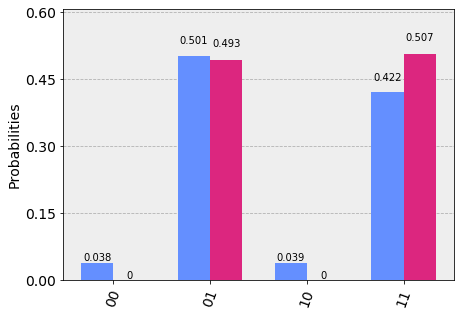

In [12]:
import matplotlib
%matplotlib inline
from qiskit.visualization import plot_histogram
 
counts_real = result_real.get_counts(circuito)
counts_simu = result_simu.get_counts(circuito)
plot_histogram([counts_real,counts_simu])